In [9]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import curve_fitting as cf
import bluepyopt.deapext.algorithms as algo
import generalized_genSim_shorten_time as ggsd
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
import eval_helper_na16 as eh16
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf

In [2]:
act = ggsd.Activation(channel_name = 'na16')

In [3]:
act.clamp_at_volt(0)

In [4]:
starting_index = list(act.i_vec).index(act.find_ipeaks_with_index()[1])
upper = 700

In [5]:
def fit_expon(x, a, b, c):
    return a + b * np.exp(-1 * c * x)
popt, pcov = optimize.curve_fit(fit_expon, act.t_vec[starting_index:upper], act.i_vec[starting_index:upper]
                                , method = 'dogbox')

In [6]:
fitted_i = fit_expon(act.t_vec[starting_index:upper],popt[0],popt[1],popt[2])

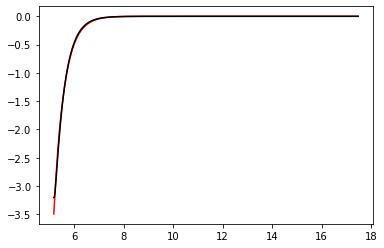

In [7]:
plt.plot(act.t_vec[starting_index:upper], fitted_i, c='red')
plt.plot(act.t_vec[starting_index:upper], act.i_vec[starting_index:upper], c='black')
plt.savefig("jinan_act.pdf", bbox_inches='tight')

In [8]:
tau = popt[2]

In [9]:
tau

2.380432550264565

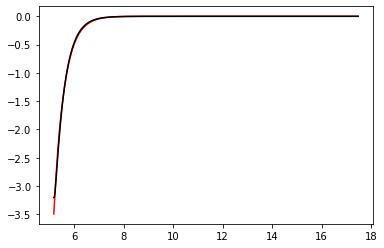

2.380432550264565

In [11]:
eh16.find_tau0(make_plot = 1)

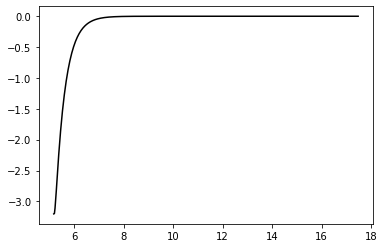

In [8]:
plt.plot(act.t_vec[starting_index:upper], act.i_vec[starting_index:upper], c='black')
plt.savefig("jinan_test.pdf", bbox_inches='tight')